In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import SIMION_utils as su
import importlib
import pandas as pd

In [54]:
base = 'D:/Simulation Data/SIMION/250113/Funnel params/'
#base = 'D:/Simulation Data/SIMION/250107/Lens holder/'
file = 'run3'
ftype = '.csv'

In [55]:
data = pd.read_csv(base+file+ftype, names=list('abcdefghij')) 

C:\Users\thoma\AppData\Local\Temp\ipykernel_39880\1769247701.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(base+file+ftype, names=list('abcdefghij'))


In [56]:
da1 = np.array([i for i in data.values])

In [57]:
run_begs = np.where((np.transpose(da1[37:])[0] == '1'))[0][::2]
run_begs2 = np.where((np.transpose(da1[37:])[0] == 1))[0][::2]

In [58]:
run_begs = np.concatenate((run_begs, run_begs2))

In [59]:
effs = []
errs = []
splat_times = []
indicess = []
indicess2 = []

effs_oth = []

for m, j in enumerate(run_begs[:]):
    if j == run_begs[-1]:
        #print([i for i in da1[j+37:] if i[0] == 'stopped after max_time'])
        da2 = np.array([i for i in da1[j+37:] if i[0] != 'stopped after max_time' and i[0] != 'ion hit particle' and i[0] != 'ion hit lens'])
        da2 = da2[::2, 0:5].astype('float')
        print(len([i for i in da1[j+37:] if i[0] == 'ion hit particle']))
        print(len([i for i in da1[j+37:] if i[0] == 'ion hit lens']))
        print(len(da2))
        effs_oth.append(len([i for i in da1[j+37:] if i[0] == 'ion hit particle'])/len(da2))
    else:
        #print([i for i in da1[j+37:j+37] if i[0] == 'stopped after max_time'])
        da2 = np.array([i for i in da1[j+37:run_begs[m+1]+37] if i[0] != 'stopped after max_time' and i[0] != 'ion hit particle' and i[0] != 'ion hit lens'])
        da2 = da2[::2, 0:5].astype('float')
        print(len([i for i in da1[j+37:run_begs[m+1]+37] if i[0] == 'ion hit particle']))
        print(len([i for i in da1[j+37:run_begs[m+1]+37] if i[0] == 'ion hit lens']))
        print(len(da2))
        effs_oth.append(len([i for i in da1[j+37:run_begs[m+1]+37] if i[0] == 'ion hit particle'])/len(da2))
    
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(10):
        i = 0
        j = 0
        da_tmp = da2[l*100:(l+1)*100]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[2]-6.5)**2 + (k[3]-6.5)**2 + k[4]**2)<0.1:
                i+=1
                if n != 0:
                    indices.append(n+l*10-1)
            else:
                j +=1
                if n != 0:
                    indices2.append(n+l*10-1)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(10))
    indicess.append(indices)
    indicess2.append(indices2)

1
0
1000
12
84
1000
40
179
1000
10
55
1000
0
3
1000
0
0
1000
0
0
1000
0
3
1000
11
73
1000
37
178
1000
31
163
1000
4
12
1000
0
1
1000
0
0
1000
0
2
1000
14
74
1000
32
174
1000
42
171
1000
14
52
1000
0
6
1000
0
0
1000
0
2
1000
14
75
1000
30
129
1000
42
133
1000
17
79
1000
2
16
1000
0
0
1000
0
3
1000
13
42
1000
27
103
1000
29
133
1000
26
85
1000
8
25
1000
0
1
1000
1
2
1000
6
45
1000
21
95
1000
20
110
1000
20
74
1000
15
34
1000
1
4
1000


In [60]:
75/350

0.21428571428571427

Text(0.5, 0, 'Lens holder voltage')

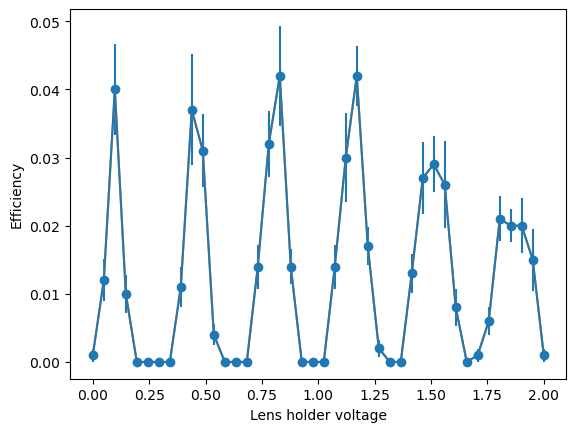

In [61]:
plt.errorbar(np.linspace(0, 2, len(effs)), effs, yerr = errs, marker = 'o')
plt.plot(np.linspace(0, 2, len(effs_oth)), effs_oth)
plt.ylabel('Efficiency')
plt.xlabel('Lens holder voltage')

In [62]:
effs_re = np.reshape(effs[:], (6, 7))

In [63]:
0.02**2

0.0004

In [64]:
1.02**2-1**2

0.04039999999999999

In [65]:
effs[:4]

[0.001, 0.012, 0.04, 0.009999999999999998]

In [66]:
effs_re

array([[0.001, 0.012, 0.04 , 0.01 , 0.   , 0.   , 0.   ],
       [0.   , 0.011, 0.037, 0.031, 0.004, 0.   , 0.   ],
       [0.   , 0.014, 0.032, 0.042, 0.014, 0.   , 0.   ],
       [0.   , 0.014, 0.03 , 0.042, 0.017, 0.002, 0.   ],
       [0.   , 0.013, 0.027, 0.029, 0.026, 0.008, 0.   ],
       [0.001, 0.006, 0.021, 0.02 , 0.02 , 0.015, 0.001]])

Text(0.5, 0, 'Endcap voltage (V)')

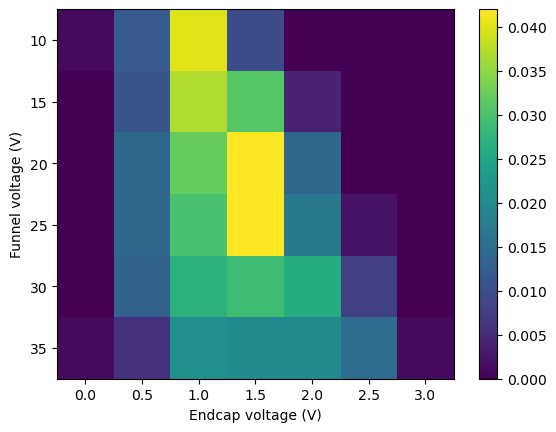

In [67]:
plt.imshow(effs_re, extent = [-0.25, 3.25, 37.5, 7.5], aspect = 'auto')
plt.colorbar()
plt.ylabel('Funnel voltage (V)')
plt.xlabel('Endcap voltage (V)')

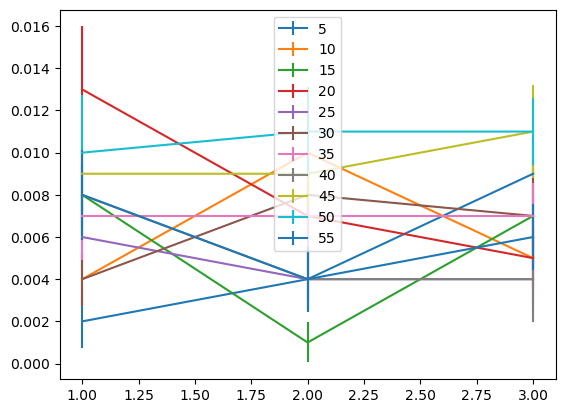

In [300]:
for i in range(11):
    plt.errorbar(np.linspace(1, 3, 3), effs_oth[i*3:(i+1)*3], yerr = errs[i*3:(i+1)*3], label = str((i+1)*5))
plt.legend()

In [301]:
effs_re_t = np.transpose(effs_re)
errs_re_t = np.transpose(np.reshape(errs, (11, 3)))

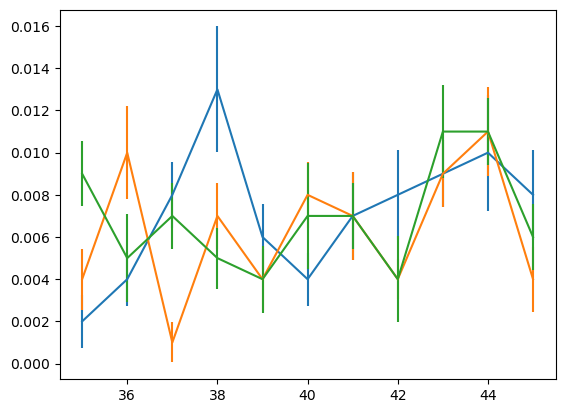

In [302]:
for n, i in enumerate(effs_re_t):
    plt.errorbar(np.linspace(35, 45, 11), i, yerr= errs_re_t[n])